In [23]:
import numpy as np
from numpy import float64
import matplotlib.pyplot as plt

In [24]:
pulsar_data = np.load("/home/mehul/RadioKSP/Untitled Folder/final_pulsar_data.npy")

In [25]:
print(pulsar_data.shape)

(32, 254)


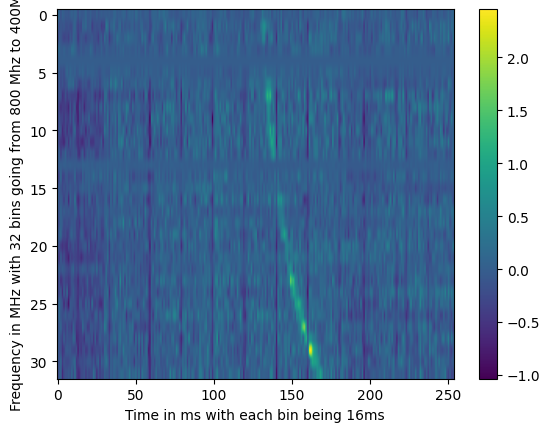

In [26]:
plt.imshow(pulsar_data,aspect="auto")

plt.xlabel("Time in ms with each bin being 16ms")
plt.ylabel("Frequency in MHz with 32 bins going from 800 Mhz to 400Mhz")


plt.colorbar()
plt.savefig("PulsarData.png")

In [27]:
def dmfunc(dm, nu):
    return (4.148808)*(10**6)*(dm)*(nu**(-2))

freq = np.linspace(800,400,32)


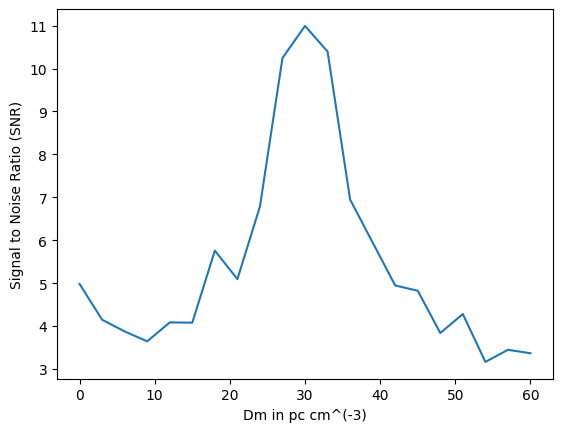

In [28]:
def snr(dm):
    time_delays = ((dmfunc(dm,freq)) - dmfunc(dm,800))/16
    new_data = []
    for i in range(32):
        new_data.append(np.roll(pulsar_data[i],-int(time_delays[i])))
    new_data= np.array(new_data)
    timeseries = np.sum(new_data,axis=0)
        
    max_value = max(abs(timeseries))
    mean = np.mean(abs(timeseries))
    
    return (max_value/mean)

x = np.linspace(0,60,21)
snr_ratios = []
for a in x:
    
    snr_ratios.append(snr(a))
    
plt.xlabel("Dm in pc cm^(-3)")
plt.ylabel('Signal to Noise Ratio (SNR)')
plt.plot(x,snr_ratios)

plt.savefig("SNR.png")
    

In [29]:
#Time Delays
print(np.argmax(pulsar_data[31]))

time_delays = ((dmfunc(29.9,freq)) - dmfunc(29.9,800))/16 

print(time_delays)

168
[ 0.          0.40044236  0.82107323  1.26327287  1.72854153  2.21851221
  2.734965    3.27984327  3.85527201  4.46357852  5.10731604  5.78929053
  6.51259136  7.28062629  8.09716175  8.96636904  9.89287777 10.8818376
 11.93898993 13.07075148 14.28431184 15.58774794 16.99015882 18.50182481
 20.13439651 21.90111995 23.81710606 25.89965495 28.16864774 30.64702284
 33.36135797 36.3425857 ]


In [30]:
for i in range(32):
    pulsar_data[i] = np.roll(pulsar_data[i],-int(time_delays[i]))
            
print(np.argmax(pulsar_data[31]))

132


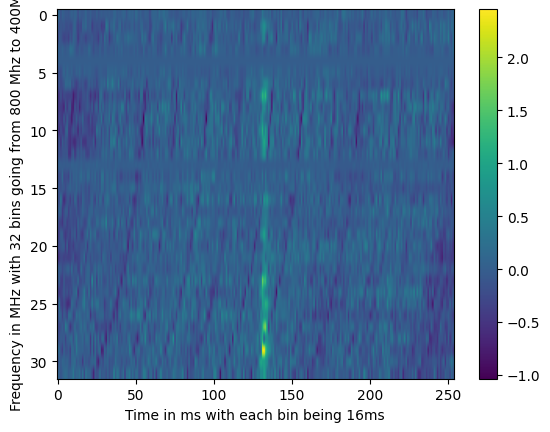

In [31]:
plt.imshow(pulsar_data,aspect="auto")
plt.xlabel("Time in ms with each bin being 16ms")
plt.ylabel("Frequency in MHz with 32 bins going from 800 Mhz to 400Mhz")


plt.colorbar()
plt.savefig("DMCorrected.png")